In [5]:
import numpy as np # 1st cell for imports
import pandas as pd
import matplotlib.pyplot as plt

1. Load the data.

In [6]:
housing = pd.read_excel("1553768847_housing.xlsx") #reading of data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [7]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
X =housing.drop('median_house_value', axis=1)

In [10]:
y = housing['median_house_value']

In [11]:
X.shape

(20640, 9)

In [12]:
y.shape

(20640,)

In [13]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [14]:
X['total_bedrooms'][X['total_bedrooms'].isnull()] = np.mean(X['total_bedrooms']) # can use simple imputer

<ipython-input-14-3a93712d9d20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_bedrooms'][X['total_bedrooms'].isnull()] = np.mean(X['total_bedrooms'])


In [15]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [16]:
y.isnull().sum()

0

In [17]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le =LabelEncoder()

In [21]:
X['ocean_proximity'] = le.fit_transform(X['ocean_proximity'])

In [22]:
X['ocean_proximity']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int32

In [23]:
## Splitting the data

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_ytrain,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [28]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
X_train_std = scaler.fit_transform(X_train)

In [33]:
X_test_std =scaler.fit_transform(X_test)

In [34]:
# Linear Regression`

In [35]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [40]:
model.fit(X_train_std,y_ytrain)

LinearRegression()

In [41]:
model.score(X_train_std,y_ytrain)

0.6320295308858719

In [42]:
y_preds = model.predict(X_test_std)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mse = mean_squared_error(y_test,y_preds)

In [45]:
rmse = np.sqrt(mse)

In [46]:
print(rmse)

68876.74950417972


In [47]:
#Decision tree regression

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
tree =DecisionTreeRegressor(min_samples_split=5)

In [56]:
tree.fit(X_train_std,y_ytrain)

DecisionTreeRegressor(min_samples_split=5)

In [57]:
tree.score(X_train_std,y_ytrain)

0.9801418515026031

In [58]:
tree_preds = tree.predict(X_test_std)

In [59]:
rmse_tree = np.sqrt(mean_squared_error(y_test,tree_preds))

In [60]:
print(rmse_tree)

81718.55593323478


In [61]:
#random forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor()

In [64]:
rf.fit(X_train_std,y_ytrain)

RandomForestRegressor()

In [66]:
rf.score(X_train_std,y_ytrain)

0.9747066326298115

In [67]:
rf_preds = rf.predict(X_test_std)

In [68]:
rmse_rf = np.sqrt(mean_squared_error(y_test,rf_preds))

In [69]:
print(rmse_rf)

60638.96449310792


In [70]:
#take random forest as the final model

In [71]:
X_train_slr =X_train['median_income']

In [72]:
X_test_slr = X_test['median_income']

In [73]:
model_slr = LinearRegression()

In [75]:
model_slr.fit(X_train_slr.values.reshape(-1,1),y_ytrain)

LinearRegression()

In [76]:
model_slr.score(X_train_slr.values.reshape(-1,1),y_ytrain) #-1 created transpose

0.47042402242884873

In [78]:
y_preds_slr = model_slr.predict(X_test_slr.values.reshape(-1,1))

In [79]:
rmse_slr = np.sqrt(mean_squared_error(y_test,y_preds_slr))

In [80]:
print(rmse_slr)

83507.53728768947


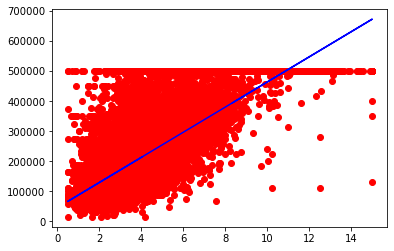

In [86]:
plt.scatter(X_train_slr,y_ytrain,color='red')
plt.plot(X_train_slr,model_slr.predict(X_train_slr.values.reshape(-1,1)),color='blue')

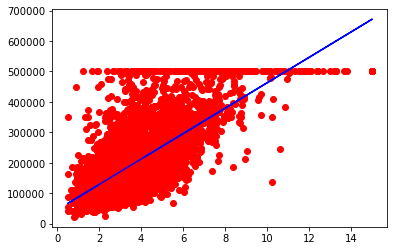

In [88]:
plt.scatter(X_test_slr,y_test,color='red')
plt.plot(X_test_slr,y_preds_slr,color='blue')